## Importando as bibliotecas

In [82]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import collections
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Flatten, Dropout, Conv2D, MaxPooling2D

## Importando o dataset MNIST

O dataset MNIST é uma grande base de dados de dígitos manuscritos utilizada para treinamento de diversos sistemas de processamento de imagens, possuindo também aplicações em treinamentos e testes de Machine Learning.
- 70 mil imagens
- 60 mil para treinamento
- 10 mil para teste
- Imagens com tamanho exato de 28x28 pixels

In [83]:
mnist = tf.keras.datasets.mnist
(img_train, num_train) , (img_test, num_test) = mnist.load_data()

## Verificação dos dados

#### Imagens de treinamento

In [84]:
img_train.shape

(60000, 28, 28)

#### Imagens de teste

In [85]:
img_test.shape

(10000, 28, 28)

#### Labels de treinamento

In [86]:
num_train.shape

(60000,)

#### Labels de teste

In [87]:
num_test.shape

(10000,)

#### Grupos diferentes no conjunto de labels

In [88]:
np.unique(num_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

A quantidade de 10 grupos diferentes no conjunto de labels é exatamente o esperado, já que é a mesma quantidade de dígitos que podem ser manuscritos no contexto desse dataset.

#### Ocorrências de cada número no conjunto de treinamento

In [89]:
sorted(collections.Counter(num_train).items())

[(0, 5923),
 (1, 6742),
 (2, 5958),
 (3, 6131),
 (4, 5842),
 (5, 5421),
 (6, 5918),
 (7, 6265),
 (8, 5851),
 (9, 5949)]

#### Ocorrências de cada número no conjunto de teste

In [90]:
sorted(collections.Counter(num_test).items())

[(0, 980),
 (1, 1135),
 (2, 1032),
 (3, 1010),
 (4, 982),
 (5, 892),
 (6, 958),
 (7, 1028),
 (8, 974),
 (9, 1009)]

## Manipulação básica dos dados

#### Visualizando uma imagem aleatória do banco de dados

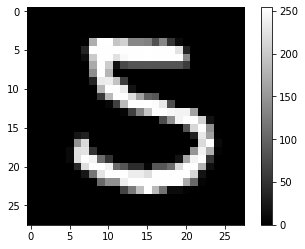

In [91]:
choice = rd.randrange(0,60000)
plt.figure()
plt.imshow(img_train[choice], cmap='gray')
plt.colorbar()
plt.show()

#### Visualizando 35 imagens aleatórias do banco de dados (7x5)

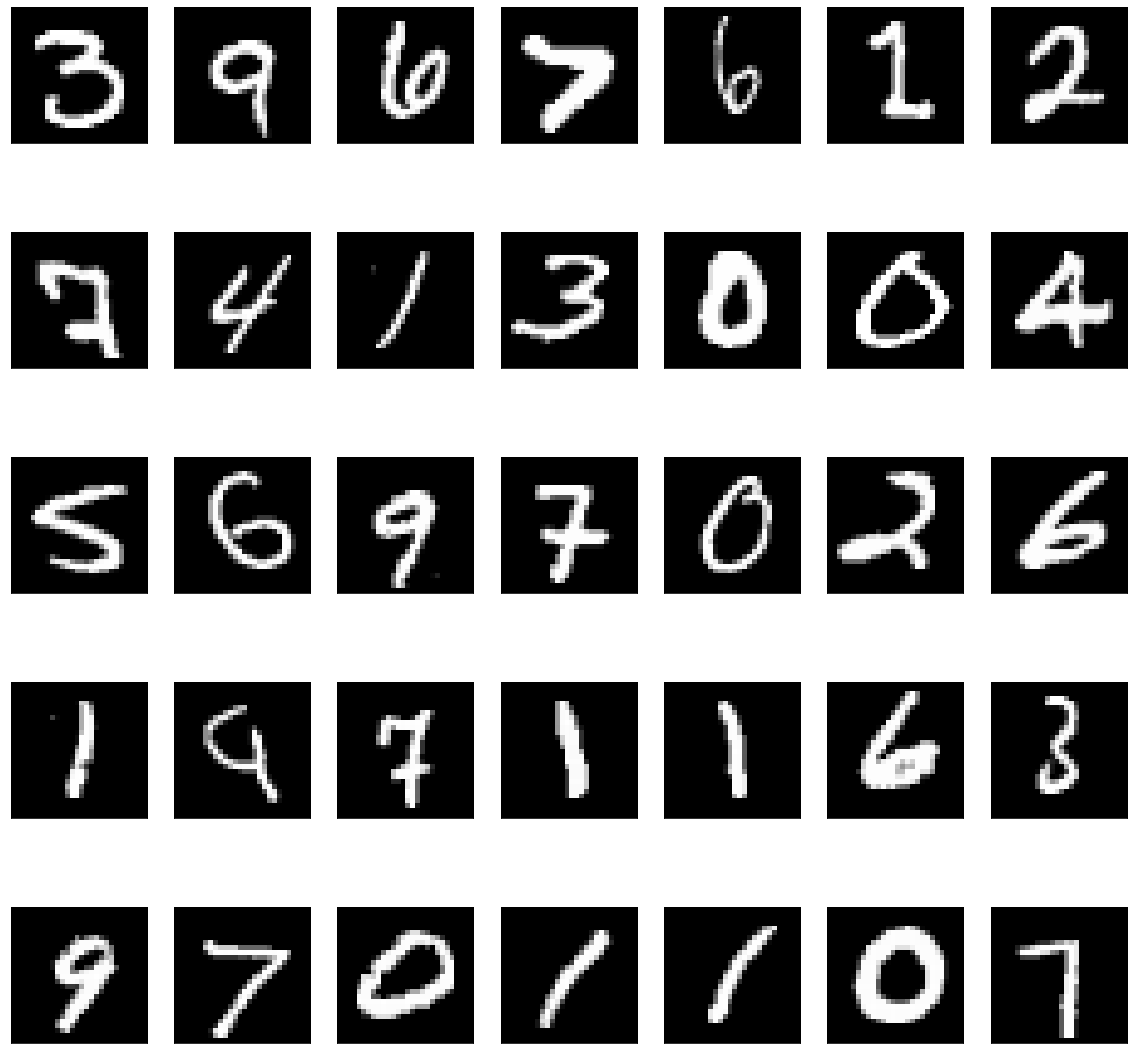

In [92]:
rdm = []
for i in range(0,35):
    addnum = rd.randint(1,60000)
    rdm.append(addnum)

plt.figure(figsize = (20 , 20))
for img, xpos in zip(rdm, range(35)):
    plt.subplot(5, 7, xpos+1)
    plt.imshow(img_train[img], cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(num_train[img], color="white")
plt.show()

## Normalizando as imagens

#### Realizando a normalização

In [93]:
# Definindo o intervalo de (0,1) para as imagens
img_train = img_train.astype('float32') / 255
img_test = img_test.astype('float32') / 255

# Definindo o formato adequado para as imagens (28, 28, 1)
img_train = np.expand_dims(img_train, -1)
img_test = np.expand_dims(img_test, -1)

# Transformando os 10 grupos de dígitos em 10 colunas binárias
num_train = keras.utils.to_categorical(num_train, 10)
num_test = keras.utils.to_categorical(num_test, 10)

#### Checando a normalização

In [94]:
print('Formato das imagens de treinamento: ', img_train.shape)
print('Formato das imagens de teste: ', img_test.shape)
print('Formato das labels de treinamento: ', num_train.shape)
print('Formato das labels de teste: ', num_test.shape)

Formato das imagens de treinamento:  (60000, 28, 28, 1)
Formato das imagens de teste:  (10000, 28, 28, 1)
Formato das labels de treinamento:  (60000, 10)
Formato das labels de teste:  (10000, 10)


## Modelo 1 (relu)

#### Criação

In [95]:
modelo1 = Sequential()

modelo1.add(Input(shape = (28, 28, 1)))
modelo1.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu'))
modelo1.add(MaxPooling2D(pool_size = (2, 2)))
modelo1.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
modelo1.add(MaxPooling2D(pool_size = (2, 2)))
modelo1.add(Flatten())
modelo1.add(Dropout(0.5))
modelo1.add(Dense(10, activation = 'softmax'))

#### Treinamento

In [96]:
modelo1.compile(optimizer = 'adam', metrics = ['accuracy'], loss = 'categorical_crossentropy')
modelo1.fit(x = img_train, y = num_train, epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2071 - accuracy: 0.9374
Epoch 2/15
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0796 - accuracy: 0.9758
Epoch 3/15
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0626 - accuracy: 0.9808
Epoch 4/15
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0533 - accuracy: 0.9836
Epoch 5/15
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0471 - accuracy: 0.9855
Epoch 6/15
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0440 - accuracy: 0.9861
Epoch 7/15
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0387 - accuracy: 0.9880
Epoch 8/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0368 - accuracy: 0.9883
Epoch 9/15
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0340 - accuracy: 0.9893
Epoch 10/15
1875/1875 [==============================] - 34s 18m

#### Performance

In [97]:
test_loss, test_acc = modelo1.evaluate(img_test, num_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0249 - accuracy: 0.9923


#### Teste manual aleatório

In [98]:
prob1 = tf.keras.Sequential([modelo1, tf.keras.layers.Softmax()])
pred1 = prob1.predict(img_test)
np.argmax(pred1[153])

313/313 [==============================] - 2s 7ms/step


5

O modelo apontou que a imagem 153 é um número 5

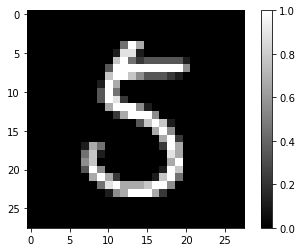

In [99]:
plt.figure()
plt.imshow(img_test[153], cmap='gray')
plt.colorbar()
plt.show()

In [100]:
num_test[153]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Como já esperado após a visualização, a imagem 153 é realmente um número 5 e o modelo acertou. Além disso, é mais uma evidência da etapa de normalização, que transformou as classes de 0 a 9 em colunas binárias.

## Modelo 2 (softplus)

#### Criação

In [101]:
modelo2 = Sequential()

modelo2.add(Input(shape = (28, 28, 1)))
modelo2.add(Conv2D(32, kernel_size = (3, 3), activation = 'softplus'))
modelo2.add(MaxPooling2D(pool_size = (2, 2)))
modelo2.add(Conv2D(64, kernel_size = (3, 3), activation = 'softplus'))
modelo2.add(MaxPooling2D(pool_size = (2, 2)))
modelo2.add(Flatten())
modelo2.add(Dropout(0.5))
modelo2.add(Dense(10, activation = 'softmax'))

#### Treinamento

In [102]:
modelo2.compile(optimizer = 'adam', metrics = ['accuracy'], loss = 'categorical_crossentropy')
modelo2.fit(x = img_train, y = num_train, epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 45s 24ms/step - loss: 0.6136 - accuracy: 0.7900
Epoch 2/15
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1668 - accuracy: 0.9499
Epoch 3/15
1875/1875 [==============================] - 46s 24ms/step - loss: 0.1304 - accuracy: 0.9606
Epoch 4/15
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1130 - accuracy: 0.9655
Epoch 5/15
1875/1875 [==============================] - 48s 25ms/step - loss: 0.0987 - accuracy: 0.9704
Epoch 6/15
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0919 - accuracy: 0.9725
Epoch 7/15
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0836 - accuracy: 0.9745
Epoch 8/15
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0770 - accuracy: 0.9768
Epoch 9/15
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0711 - accuracy: 0.9780
Epoch 10/15
1875/1875 [==============================] - 46s 24m

#### Performance

In [103]:
test_loss, test_acc = modelo2.evaluate(img_test, num_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0291 - accuracy: 0.9900


## Modelo 3 (softsign)

#### Criação

In [104]:
modelo3 = Sequential()

modelo3.add(Input(shape = (28, 28, 1)))
modelo3.add(Conv2D(32, kernel_size = (3, 3), activation = 'softsign'))
modelo3.add(MaxPooling2D(pool_size = (2, 2)))
modelo3.add(Conv2D(64, kernel_size = (3, 3), activation = 'softsign'))
modelo3.add(MaxPooling2D(pool_size = (2, 2)))
modelo3.add(Flatten())
modelo3.add(Dropout(0.5))
modelo3.add(Dense(10, activation = 'softmax'))

#### Treinamento

In [105]:
modelo3.compile(optimizer = 'adam', metrics = ['accuracy'], loss = 'categorical_crossentropy')
modelo3.fit(x = img_train, y = num_train, epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2357 - accuracy: 0.9301
Epoch 2/15
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0934 - accuracy: 0.9722
Epoch 3/15
1875/1875 [==============================] - 37s 19ms/step - loss: 0.0771 - accuracy: 0.9760
Epoch 4/15
1875/1875 [==============================] - 37s 19ms/step - loss: 0.0708 - accuracy: 0.9782
Epoch 5/15
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0635 - accuracy: 0.9803
Epoch 6/15
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0611 - accuracy: 0.9815
Epoch 7/15
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0575 - accuracy: 0.9821
Epoch 8/15
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0574 - accuracy: 0.9822
Epoch 9/15
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0546 - accuracy: 0.9829
Epoch 10/15
1875/1875 [==============================] - 37s 20m

#### Performance

In [106]:
test_loss, test_acc = modelo3.evaluate(img_test, num_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0358 - accuracy: 0.9882


## Modelo 4 (selu)

#### Criação e treinamento

In [107]:
modelo4 = Sequential()

modelo4.add(Input(shape = (28, 28, 1)))
modelo4.add(Conv2D(32, kernel_size = (3, 3), activation = 'selu'))
modelo4.add(MaxPooling2D(pool_size = (2, 2)))
modelo4.add(Conv2D(64, kernel_size = (3, 3), activation = 'selu'))
modelo4.add(MaxPooling2D(pool_size = (2, 2)))
modelo4.add(Flatten())
modelo4.add(Dropout(0.5))
modelo4.add(Dense(10, activation = 'softmax'))

#### Treinamento

In [108]:
modelo4.compile(optimizer = 'adam', metrics = ['accuracy'], loss = 'categorical_crossentropy')
modelo4.fit(x = img_train, y = num_train, epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2179 - accuracy: 0.9349
Epoch 2/15
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1023 - accuracy: 0.9683
Epoch 3/15
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0886 - accuracy: 0.9736
Epoch 4/15
1875/1875 [==============================] - 40s 22ms/step - loss: 0.0809 - accuracy: 0.9745
Epoch 5/15
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0737 - accuracy: 0.9781
Epoch 6/15
1875/1875 [==============================] - 40s 22ms/step - loss: 0.0726 - accuracy: 0.9776
Epoch 7/15
1875/1875 [==============================] - 40s 22ms/step - loss: 0.0677 - accuracy: 0.9790
Epoch 8/15
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0649 - accuracy: 0.9803
Epoch 9/15
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0669 - accuracy: 0.9797
Epoch 10/15
1875/1875 [==============================] - 40s 21m

#### Performance

In [109]:
test_loss, test_acc = modelo4.evaluate(img_test, num_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0490 - accuracy: 0.9870


## Ranking de desempenho dos modelos convolucionais

1.      Relu - 99,23%
2.      Softplus - 99,00%
3.      Softsign - 98,82%
4.      Selu - 98,70%